### Análisis de eficiencia algoritmo greedy vs batching

#### Importamos las librerías correspondientes para el análisis de los datos.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Primero, armamos el data frame correspondiente.

In [11]:
df = pd.read_csv('../greedy_vs_batching.csv')
df.tail()

,zb,zg,zb_nueva,gap,gap_nueva,time_batching,time_greedy,filename
35,1205.4,1441.5,1255.5,0.163788,0.039904,144192.0,3890.0,xl_5.csv
36,1471.8,1737.4,1521.8,0.152872,0.032856,143984.0,3926.0,xl_6.csv
37,1367.4,1705.1,1417.4,0.198053,0.035276,265651.0,3029.0,xl_7.csv
38,1193.5,1512.7,1243.8,0.211013,0.040441,124873.0,3735.0,xl_8.csv
39,1259.4,1531.7,1309.4,0.177776,0.038185,129685.0,4020.0,xl_9.csv


##### Renombres para los gráficos

In [12]:
dict = {"small": "s", "medium": "m", "large": "l"}
df['filename'] = df['filename'].replace(dict, regex=True)
df['filename'] = df['filename'].replace({"_": ""}, regex=True)
df['filename'] = df['filename'].apply(lambda x: x.split('.')[0])

df['gap'] = df['gap'].apply(lambda x: float(x)*100.0)
df['gap_nueva'] = df['gap_nueva'].apply(lambda x: float(x)*100.0)
df['time_batching'] = df['time_batching'].apply(lambda x: float(x)/1000.0)
df['time_greedy'] = df['time_greedy'].apply(lambda x: float(x)/1000.0)


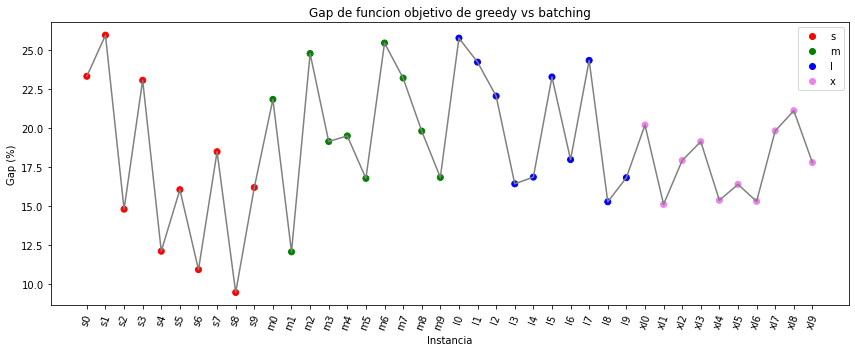

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title('Gap de funcion objetivo de greedy vs batching')
ax.set_xlabel('Instancia')
ax.set_ylabel('Gap (%)')
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.1)

colours = {"s": "red", "m": "green", "l": "blue", "x": "violet"}

plt.tight_layout()
plt.scatter(df['filename'], df['gap'], c=df['filename'].apply(lambda x: colours[x[0]]), label='greedy vs batching')

plt.legend(handles=[plt.Line2D([], [], ls="", marker="o", color=c, label=l) for l, c in colours.items()])

plt.plot(df['filename'], df['gap'], label='greedy vs batching', color = "grey")


##### Armamos un plot de los gaps con respecto a los filenames

In [14]:
df_small = df[df['filename'].apply(lambda x: x[0] == 's')]
df_medium = df[df['filename'].apply(lambda x: x[0] == 'm')]
df_large = df[df['filename'].apply(lambda x: x[0] == 'l')]
df_xlarge = df[df['filename'].apply(lambda x: x[0] == 'x')]

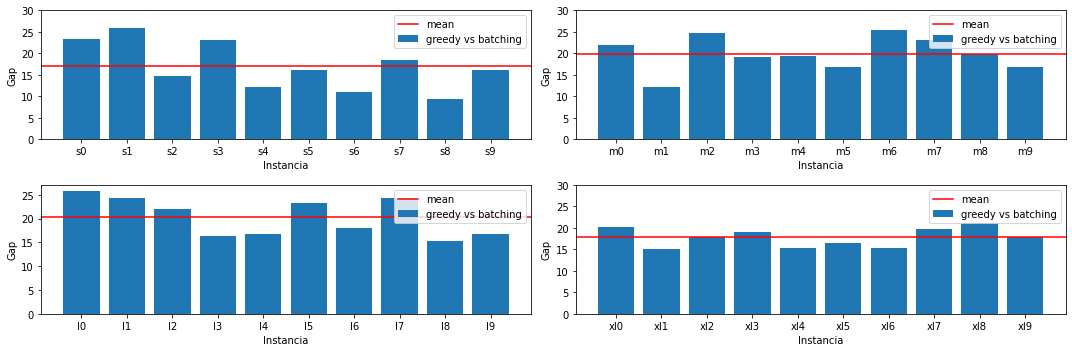

In [15]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 5))

small_mean = df_small['gap'].mean()
ax1.set_xlabel('Instancia')
ax1.set_ylabel('Gap')
ax1.axhline(df_small['gap'].mean(), color='red', label='mean')
ax1.bar(df_small['filename'], df_small['gap'],
        label='greedy vs batching')
ax1.set_ylim(0, 30)
ax1.legend()


ax2.set_xlabel('Instancia')
ax2.set_ylabel('Gap')
ax2.axhline(df_medium['gap'].mean(), color='red', label='mean')
ax2.bar(df_medium['filename'], df_medium['gap'],
        label='greedy vs batching')
ax2.set_ylim(0, 30)
ax2.legend()


ax3.set_xlabel('Instancia')
ax3.set_ylabel('Gap')
ax3.axhline(df_large['gap'].mean(), color='red', label='mean')
ax3.bar(df_large['filename'], df_large['gap'],
        label='greedy vs batching')
ax2.set_ylim(0, 30)
ax3.legend()


ax4.set_xlabel('Instancia')
ax4.set_ylabel('Gap')
ax4.axhline(df_xlarge['gap'].mean(), color='red', label='mean')
ax4.bar(df_xlarge['filename'], df_xlarge['gap'],
        label='greedy vs batching')
ax4.set_ylim(0, 30)
ax4.legend()

fig.tight_layout()

plt.show()


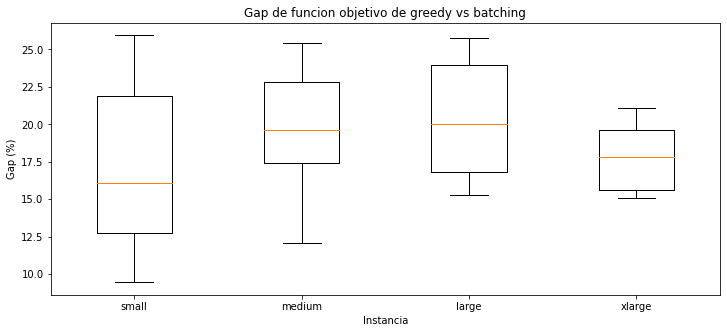

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.ylabel('Gap (%)')
plt.xlabel('Instancia')
plt.title('Gap de funcion objetivo de greedy vs batching')
plt.boxplot([df_small['gap'], df_medium['gap'], df_large['gap'], df_xlarge['gap']], labels=['small', 'medium', 'large', 'xlarge'])
plt.show()

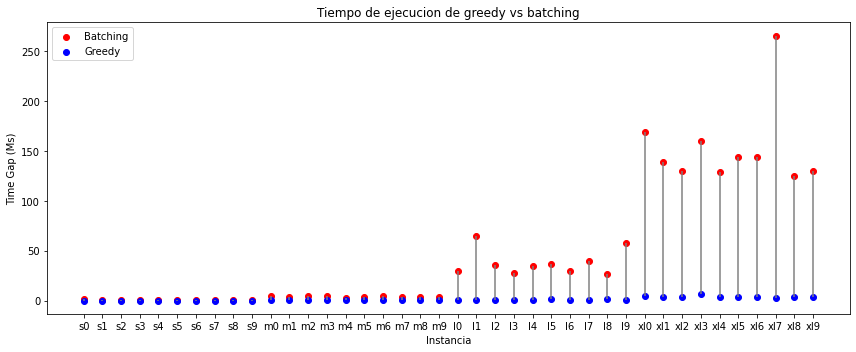

In [17]:
fig, ax = plt.subplots(figsize = (12,5))

plt.title('Tiempo de ejecucion de greedy vs batching')

ax.set_xlabel('Instancia')
ax.set_ylabel('Time Gap (Ms)')
ax.scatter(df['filename'], df['time_batching'], color='red')
ax.scatter(df['filename'], df['time_greedy'], color='blue')
ax.vlines(df['filename'], df['time_greedy'],
           df['time_batching'], color='grey', label='batching')
plt.tight_layout()
ax.legend(['Batching', 'Greedy'], loc = 'upper left',)


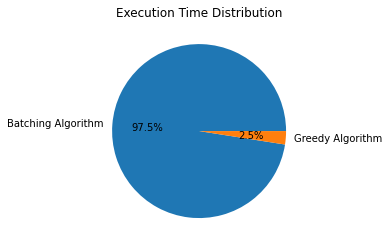

In [18]:
time_data = df[['time_batching', 'time_greedy']].sum()
labels = ['Batching Algorithm', 'Greedy Algorithm']
plt.pie(time_data, labels=labels, autopct='%1.1f%%')
plt.title('Execution Time Distribution')
plt.show()

### Comparación del nuevo algoritmo que prioriza los taxis

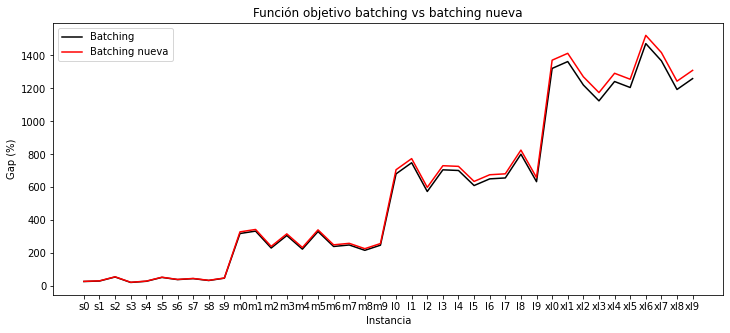

In [24]:
fig, ax  = plt.subplots(figsize = (12,5))
plt.title('Función objetivo batching vs batching nueva')
plt.plot(df['filename'], df['zb'], label='batching', color = "black")
plt.plot(df['filename'], df['zb_nueva'], label='batching', color = "red")
plt.xlabel('Instancia')
plt.ylabel('Funcion objetivo')
plt.legend(['Batching', 'Batching nueva'], loc = 'upper left',)
plt.show()